In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler

In [94]:
import warnings
warnings.filterwarnings('ignore')

In [95]:
df_train = pd.read_csv('Train_Data.csv')
df_train

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,69,12,818,DX6,58,25.515286,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
25916,21001,39,11500,DX6,16,27.094959,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
25917,4263,44,2796,DX1,8,28.602921,NO,RURAL,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
25918,11208,52,12190,DX1,52,21.909832,NO,RURAL,Stable,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1


In [96]:
df_test = pd.read_csv('Test_Data.csv')
df_test

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,28534,2,3306,DX6,38,18.879331,YES,URBAN,Stable,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,7970,5,5573,DX1,46,21.231991,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,22039,37,9305,DX4,11,17.867876,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12332,44,8274,DX5,10,26.886096,NO,RURAL,Stable,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,4116,37,4558,DX3 DX4,3,23.362746,NO,RURAL,Stable,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,23747,21,3612,DX3,27,28.880884,NO,URBAN,Stable,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
6476,26138,27,4169,DX3,8,20.358229,NO,RURAL,Stable,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
6477,7536,39,8525,DX6,29,27.365294,NO,RURAL,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6478,29410,29,1866,DX5,65,22.546412,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [97]:
df_train.shape

(25920, 18)

In [98]:
df_test.shape

(6480, 17)

In [99]:
df_train.isnull().sum()

ID1                            0
Specific ailments              0
ID2                            0
Food preference               10
Age                            0
BMI                            0
Smoker?                        0
Living in?                     0
Any heriditary condition?      0
Follow Diet                  973
Physical activity            973
Regular sleeping hours       973
Alcohol consumption          973
Social interaction           973
Taking supplements           973
Mental health management     973
Illness count last year      973
Healthy                        0
dtype: int64

In [100]:
df_test.isnull().sum()

ID1                            0
Specific ailments              0
ID2                            0
Food preference                3
Age                            0
BMI                            0
Smoker?                        0
Living in?                     0
Any heriditary condition?      0
Follow Diet                  262
Physical activity            262
Regular sleeping hours       262
Alcohol consumption          262
Social interaction           262
Taking supplements           262
Mental health management     262
Illness count last year      262
dtype: int64

In [101]:
df_train.dropna(subset=['Food preference'],inplace=True)

In [102]:
df_test.dropna(subset=['Food preference'],inplace=True)

In [103]:
df_train['Any heriditary condition?'].unique()

array(['Stable'], dtype=object)

In [104]:
df_train = df_train.drop(columns = ['Any heriditary condition?'])

In [105]:
df_test = df_test.drop(columns = ['Any heriditary condition?'])

In [106]:
df_train['Smoker?'].unique()

array(['NO', 'YES'], dtype=object)

In [107]:
df_train['Living in?'].unique()

array(['RURAL', 'URBAN'], dtype=object)

In [108]:
replace = {'NO':1, 'YES':2}
df_train['Smoker?'] = df_train['Smoker?'].replace(replace)
df_test['Smoker?'] = df_test['Smoker?'].replace(replace)

In [109]:
replace = {'URBAN':1, 'RURAL':2}
df_train['Living in?'] = df_train['Living in?'].replace(replace)
df_test['Living in?'] = df_test['Living in?'].replace(replace)

In [110]:
df_train.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,2,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [111]:
df_test.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,28534,2,3306,DX6,38,18.879331,2,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,7970,5,5573,DX1,46,21.231991,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,22039,37,9305,DX4,11,17.867876,1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12332,44,8274,DX5,10,26.886096,1,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,4116,37,4558,DX3 DX4,3,23.362746,1,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0


In [112]:
df_train['Food preference'].unique()

array(['DX6', 'DX3 DX4 ', 'DX1 ', 'DX4 DX5 ', 'DX5 ', 'DX2 ', 'DX2 DX4 ',
       'DX2 DX4 DX5 ', 'DX2 DX5 ', 'DX3 ', 'DX1 DX5 ', 'DX4 ', 'DX1 DX3 ',
       'DX1 DX2 ', 'DX1 DX3 DX4 ', 'DX1 DX3 DX5 ', 'DX1 DX2 DX5 ',
       'DX2 DX3 DX5 ', 'DX1 DX4 ', 'DX2 DX3 DX4 ', 'DX1 DX2 DX3 ',
       'DX2 DX3 ', 'DX3 DX4 DX5 ', 'DX1 DX4 DX5 ', 'DX1 DX2 DX4 ',
       'DX3 DX5 ', 'DX1 DX3 DX4 DX5 ', 'DX2 DX3 DX4 DX5 ',
       'DX1 DX2 DX4 DX5 ', 'DX1 DX2 DX3 DX5 ', 'DX1 DX2 DX3 DX4 DX5 ',
       'DX1 DX2 DX3 DX4 '], dtype=object)

In [113]:
df_train['Mental health management'].unique()

array([ 0., nan])

In [114]:
df_test['Mental health management'].unique()

array([ 0., nan])

In [115]:
df_train = df_train.drop(columns = ['Mental health management'])
df_test = df_test.drop(columns = ['Mental health management'])

In [116]:
df_train.isnull().sum()

ID1                          0
Specific ailments            0
ID2                          0
Food preference              0
Age                          0
BMI                          0
Smoker?                      0
Living in?                   0
Follow Diet                973
Physical activity          973
Regular sleeping hours     973
Alcohol consumption        973
Social interaction         973
Taking supplements         973
Illness count last year    973
Healthy                      0
dtype: int64

In [117]:
len(df_train)

25910

In [118]:
df_train.dropna(inplace=True)

In [119]:
df_train.isnull().sum()

ID1                        0
Specific ailments          0
ID2                        0
Food preference            0
Age                        0
BMI                        0
Smoker?                    0
Living in?                 0
Follow Diet                0
Physical activity          0
Regular sleeping hours     0
Alcohol consumption        0
Social interaction         0
Taking supplements         0
Illness count last year    0
Healthy                    0
dtype: int64

In [120]:
len(df_train)

24937

In [121]:
df_test.isnull().sum()

ID1                          0
Specific ailments            0
ID2                          0
Food preference              0
Age                          0
BMI                          0
Smoker?                      0
Living in?                   0
Follow Diet                262
Physical activity          262
Regular sleeping hours     262
Alcohol consumption        262
Social interaction         262
Taking supplements         262
Illness count last year    262
dtype: int64

In [122]:
len(df_test)

6477

In [123]:
df_test.dropna(inplace=True)

In [124]:
df_test.isnull().sum()

ID1                        0
Specific ailments          0
ID2                        0
Food preference            0
Age                        0
BMI                        0
Smoker?                    0
Living in?                 0
Follow Diet                0
Physical activity          0
Regular sleeping hours     0
Alcohol consumption        0
Social interaction         0
Taking supplements         0
Illness count last year    0
dtype: int64

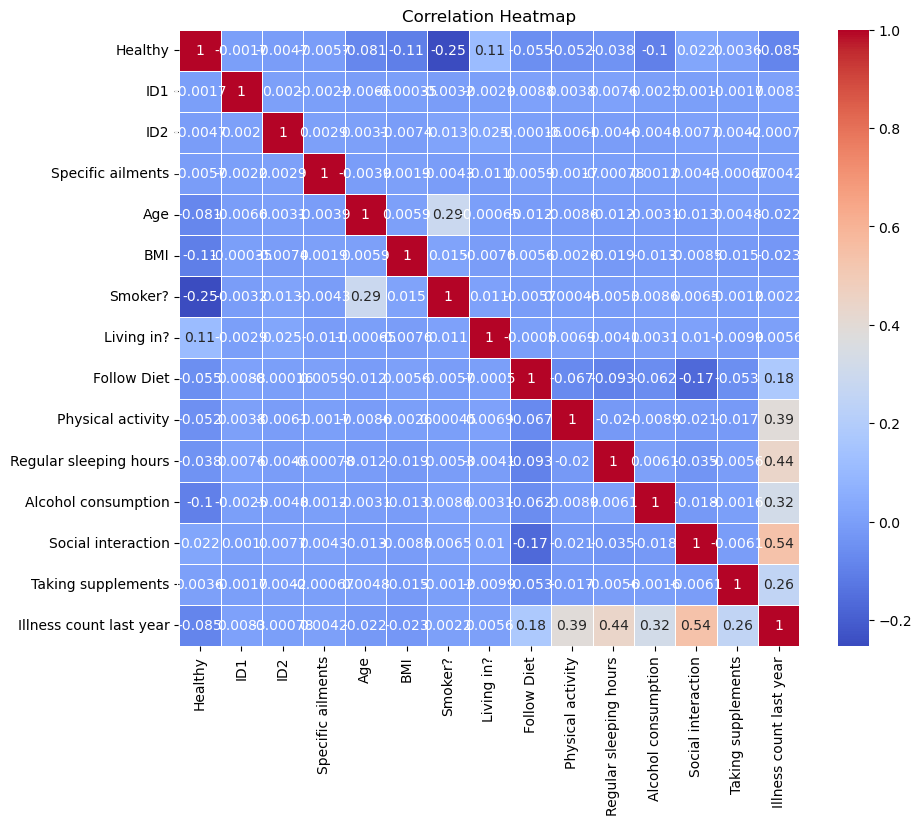

In [125]:
columns_to_plot = ['Healthy', 'ID1', 'ID2', 'Specific ailments', 'Age', 'BMI', 'Smoker?', 'Living in?', 'Follow Diet', 'Physical activity', 'Regular sleeping hours', 'Alcohol consumption', 'Social interaction', 'Taking supplements', 'Illness count last year']
data_to_plot = df_train[columns_to_plot]
plt.figure(figsize=(10, 8))
sns.heatmap(data_to_plot.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### ONE HOT ENCODING

In [126]:
df_train = pd.get_dummies(df_train, columns=['Food preference'], prefix=['Food_pref'])

In [127]:
df_train.head()

,ID1,Specific ailments,ID2,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,...,Food_pref_DX2 DX4 DX5,Food_pref_DX2 DX5,Food_pref_DX3,Food_pref_DX3 DX4,Food_pref_DX3 DX4 DX5,Food_pref_DX3 DX5,Food_pref_DX4,Food_pref_DX4 DX5,Food_pref_DX5,Food_pref_DX6
0,2408,44,2668,49,20.500470,1,2,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,25063,39,10363,20,26.076580,1,1,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,26798,29,132,1,21.420866,1,1,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,31907,27,10499,30,25.203247,1,2,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,26412,9,7963,40,19.355846,2,2,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [128]:
df_test = pd.get_dummies(df_test, columns=['Food preference'], prefix=['Food_pref'])

In [129]:
df_test.head()

,ID1,Specific ailments,ID2,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,...,Food_pref_DX2 DX4 DX5,Food_pref_DX2 DX5,Food_pref_DX3,Food_pref_DX3 DX4,Food_pref_DX3 DX4 DX5,Food_pref_DX3 DX5,Food_pref_DX4,Food_pref_DX4 DX5,Food_pref_DX5,Food_pref_DX6
0,28534,2,3306,38,18.879331,2,1,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,7970,5,5573,46,21.231991,1,1,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,22039,37,9305,11,17.867876,1,2,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,12332,44,8274,10,26.886096,1,2,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,4116,37,4558,3,23.362746,1,2,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0


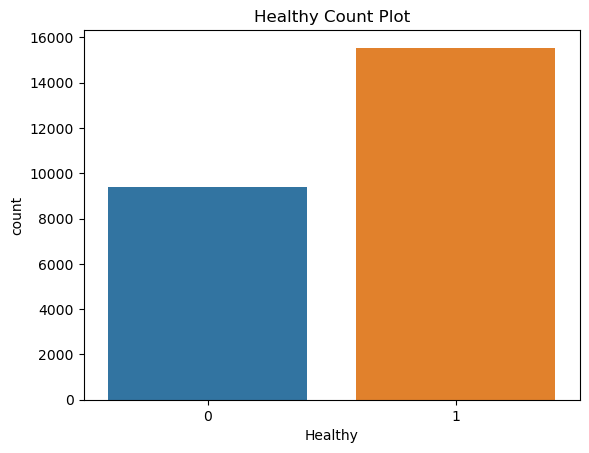

In [130]:
sns.countplot(x='Healthy', data=df_train)
plt.title('Healthy Count Plot')
plt.show()

In [131]:
y = df_train['Healthy']
X = df_train.drop(columns=['Healthy'])

In [132]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled_df.head()

,ID1,Specific ailments,ID2,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,...,Food_pref_DX2 DX4 DX5,Food_pref_DX2 DX5,Food_pref_DX3,Food_pref_DX3 DX4,Food_pref_DX3 DX4 DX5,Food_pref_DX3 DX5,Food_pref_DX4,Food_pref_DX4 DX5,Food_pref_DX5,Food_pref_DX6
0,0.072981,0.843137,0.213377,0.742424,0.269257,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.759892,0.745098,0.829026,0.303030,0.698213,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.812498,0.549020,0.010481,0.015152,0.340061,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.967405,0.509804,0.839907,0.454545,0.631030,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.800794,0.156863,0.637011,0.606061,0.181204,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [133]:
y

0        1
1        1
2        0
3        1
4        1
        ..
25915    1
25916    0
25917    1
25918    1
25919    1
Name: Healthy, Length: 24937, dtype: int64

In [134]:
X1 = df_test.copy()
scaler = MinMaxScaler()
X1_scaled = scaler.fit_transform(X1)
X1_scaled_df = pd.DataFrame(X1_scaled, columns = X1.columns)
X1_scaled_df.head()

,ID1,Specific ailments,ID2,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,...,Food_pref_DX2 DX4 DX5,Food_pref_DX2 DX5,Food_pref_DX3,Food_pref_DX3 DX4,Food_pref_DX3 DX4 DX5,Food_pref_DX3 DX5,Food_pref_DX4,Food_pref_DX4 DX5,Food_pref_DX5,Food_pref_DX6
0,0.865227,0.019608,0.264362,0.575758,0.144547,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.241584,0.078431,0.445751,0.696970,0.325531,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.668254,0.705882,0.744359,0.166667,0.066738,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.373870,0.843137,0.661866,0.151515,0.760487,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.124704,0.705882,0.364538,0.045455,0.489445,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
X_scaled_df.shape

(24937, 46)

In [136]:
X1_scaled_df.shape

(6215, 46)

In [137]:
y.shape

(24937,)

In [138]:
X_train = X_scaled_df
y_train = y
X_test = X1_scaled_df

In [139]:
# Balance the class distribution
ros = RandomOverSampler(random_state = 42)
X_train, y_train = ros.fit_resample(X_train, y_train)

#### MODEL SELECTED - ADA BOOST CLASSIFIER

In [140]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

In [141]:
y_pred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)